In [200]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleModels as nrn
import os
import pickle as pkl
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d, gaussian_filter

In [2]:
fdir = './data/w_pfc/'
# target_seeds = [1000, 2000, 3000, 4000, 6000, 7000, 8000, 9000, 9900]
target_seeds = []
for i in range(10):
    for j in range(2):
        target_seeds.append((i+1)*1000 + j*10)

In [3]:
def getFFT(x, idt):
    fx = np.fft.fft(x[idt]) / sum(idt)
    f = np.fft.fftfreq(sum(idt), nrn._dt/(1e3))
    fx = abs(fx[:int(sum(idt)//2)])
    f = f[:int(sum(idt)//2)]
    return f, fx

def find_peak(x, f, idf=None):
    if idf is None:
        idf = np.ones(len(x), dtype=bool)
    ind = np.where(x == max(x[idf]))[0][0]
    return f[ind]

label_font_props = {'fontname': 'Comic-Sans-MS', 'fontsize': 12}
tick_font_props = {'fontname': 'Helvetica', 'fontsize': 8}

In [4]:
nrn.set_times(tmax=500, dt=0.01)

In [103]:
freq, vfft = getFFT(v_avg, idt)

In [6]:
nn = 20

idt = (nrn._times>50) & (nrn._times<200)
fpeaks = np.zeros([nn, nn, len(target_seeds)])
vffts = []

for i in range(nn):
    vffts.append([])
    for j in tqdm(range(nn)):
        vffts[-1].append([])
        for k, seed in enumerate(target_seeds):
            fname = '%d_ntk_calc_vals_%d_%d.pickle'%(seed, i, j)
            with open(fdir+fname, 'rb') as f:
                vs = pkl.load(f)
            # fourier transform
            v_avg = np.average(vs, axis=1)
            f, vfft = getFFT(v_avg, idt)
            vfft = vfft[f > 1]
            # save data
            vffts[-1][-1].append(vfft)
            fpeaks[i][j][k] = find_peak(vfft, f[f > 1])


np.save('./f_1103.npy', f, allow_pickle=True)
np.save('./vffts_1103.npy', vffts, allow_pickle=True)
np.save('./fpeaks_1103.npy', fpeaks, allow_pickle=True)

100%|██████████| 20/20 [03:56<00:00, 11.81s/it]


In [7]:
gbar_pfc_exc = np.linspace(0, 0.001, nn)
gbar_pfc_inh = np.linspace(0, 0.001, nn)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Comic-Sans-MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


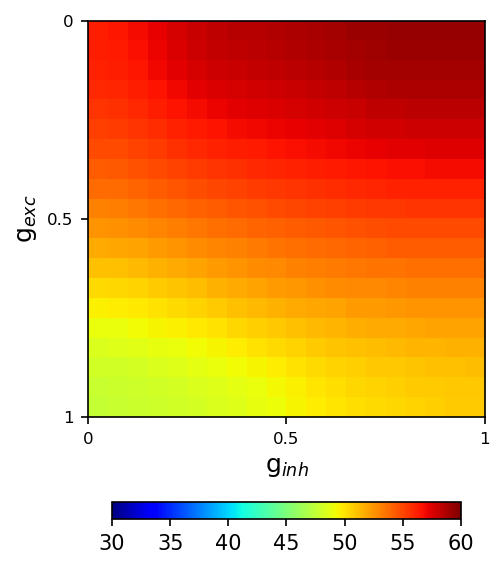

In [237]:
im = np.average(fpeaks, axis=2)
sim = gaussian_filter(im, 3)

plt.figure(dpi=150, figsize=(5, 5))
plt.imshow(sim, cmap='jet', extent=(gbar_pfc_inh[0], gbar_pfc_inh[-1], gbar_pfc_exc[-1], gbar_pfc_exc[0]),
          vmin=30, vmax=60)
plt.colorbar(shrink=0.6, orientation='horizontal')

plt.xlabel(r'g$_{inh}$', **label_font_props)
plt.ylabel(r'g$_{exc}$', **label_font_props)

plt.xticks([0,0.0005,0.001], [0, 0.5, 1], **tick_font_props)
plt.yticks([0,0.0005,0.001], [0, 0.5, 1], **tick_font_props)

plt.xticks()

plt.show()

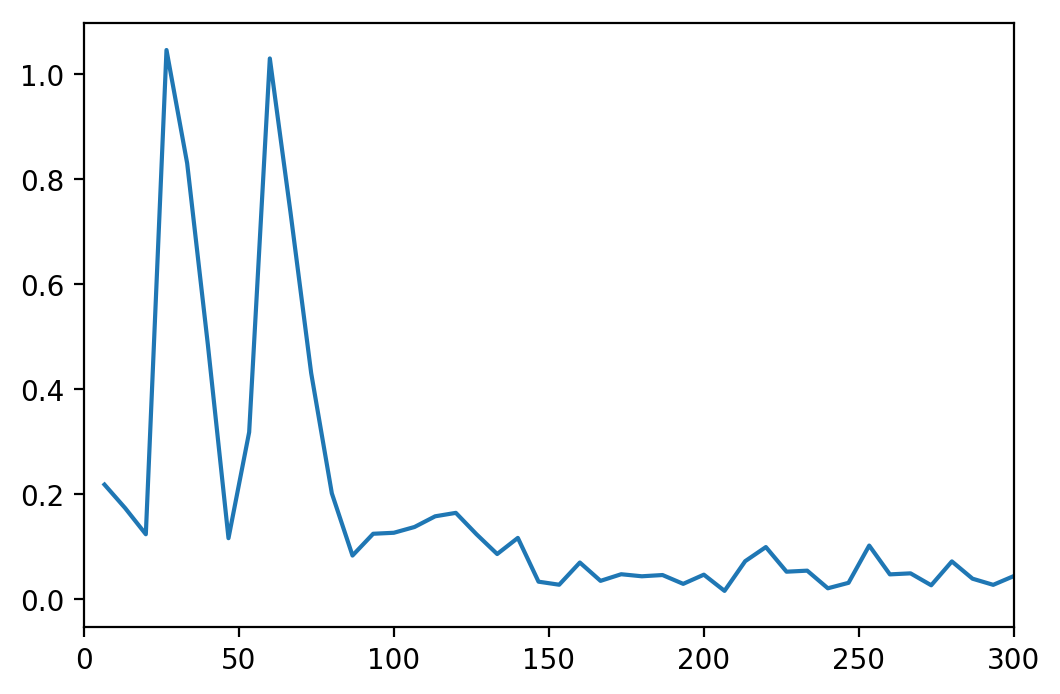

In [51]:
plt.figure(dpi=200)
plt.plot(f, vffts[0][0][2])
plt.xlim([0, 300])
plt.show()

In [30]:
f = f[f>1]
nn = 20

In [31]:
map_30 = np.zeros([nn, nn])
map_60 = np.zeros([nn, nn])

for n in range(20):
    for i in range(nn):
        for j in range(nn):
            vfft = vffts[n][i][j]
            map_30[i, j] += np.average(vfft[(f>=25)&(f<=35)])
            map_60[i, j] += np.average(vfft[(f>=55)&(f<=65)])

In [32]:
from mpl_toolkits import mplot3d

In [33]:
X, Y = np.meshgrid(gbar_pfc_exc, gbar_pfc_inh)

In [34]:
map_30.shape

(20, 20)

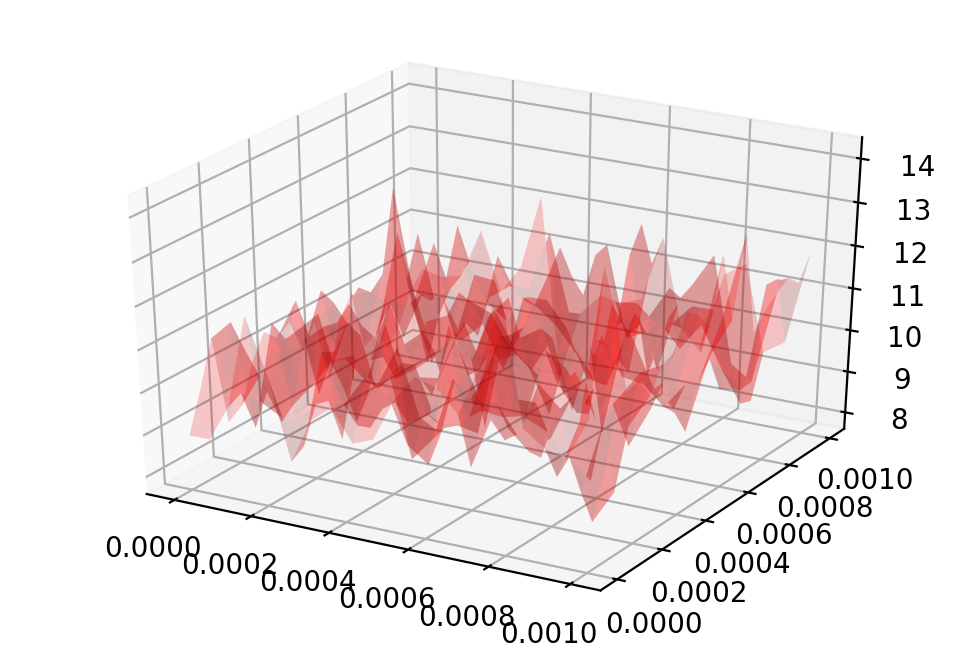

In [199]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, map_30, color='r', alpha=0.2)
# ax.plot_surface(X, Y, map_60, color='b', alpha=0.2)
plt.show()

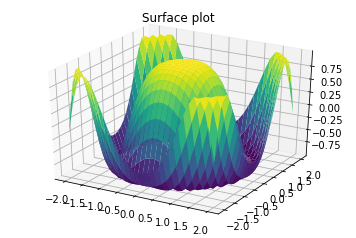

In [80]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

seed = 6000


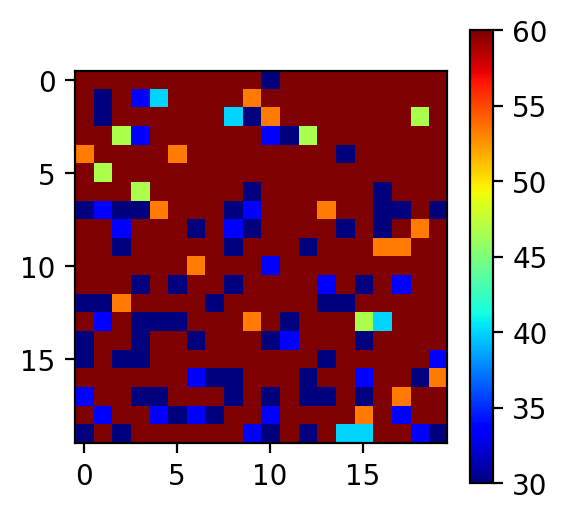

In [258]:
n  =10
print('seed =', target_seeds[n])

plt.figure(dpi=200, figsize=(3, 3))
plt.imshow(fpeaks[:, :, n], vmin=30, vmax=60, cmap='jet')
plt.colorbar()
plt.show()

2010

In [259]:
# voltage response
t = np.arange(0, nrn._tmax+nrn._dt/2, nrn._dt)
# seed = 1010
seed = 6000
row = 19
col = 10
fname = '%d_ntk_calc_vals_%d_%d.pickle'%(seed, row, col)
with open(fdir+fname, 'rb') as f:
    vs = pkl.load(f)
v_avg = np.average(vs, axis=1)
    
with open(fdir+'%d_ntk_info.pickle'%(seed), 'rb') as f:
    info = pkl.load(f)
    gexc = pkl.load(f)

In [260]:
t0 = 50
t1 = 200
f_time = np.arange(t0, t1, 1e3/28)

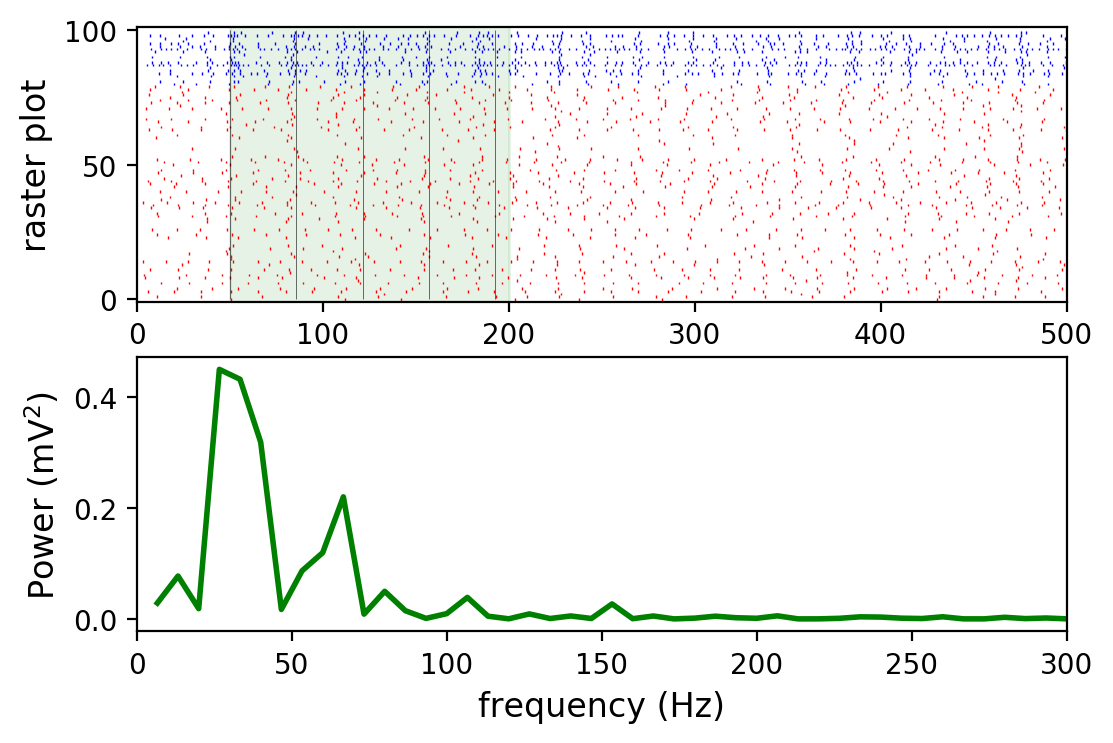

<Figure size 432x288 with 0 Axes>

In [264]:
label_props = {'FontSize': 12}

plt.figure(dpi=200, figsize=(6, 4))

plt.subplot(211)
for i in range(vs.shape[1]):
    if i < 80:
        c = 'r'
    else:
        c = 'b'
    plt.vlines(t[vs[:, i] == 30], i-0.5, i+0.5, lw=0.5, color=c)
plt.vlines(f_time, 0, 100, 'k', lw=0.2)
plt.fill_between([50, 200], 105, -5, alpha=0.1, color='g')
plt.ylim([-1, 101])
plt.xlim([0, 500])
plt.xlabel('time (ms)', **label_props)
plt.ylabel('raster plot', **label_props)

plt.subplot(212)
plt.plot(freq[1:], vffts[row][col][n]**2, 'g', lw=2)
plt.xlim([0, 300])
plt.xlabel('frequency (Hz)', **label_props)
plt.ylabel(r'Power (mV$^{2}$)', **label_props)

plt.show()

plt.tight_layout()
plt.show()

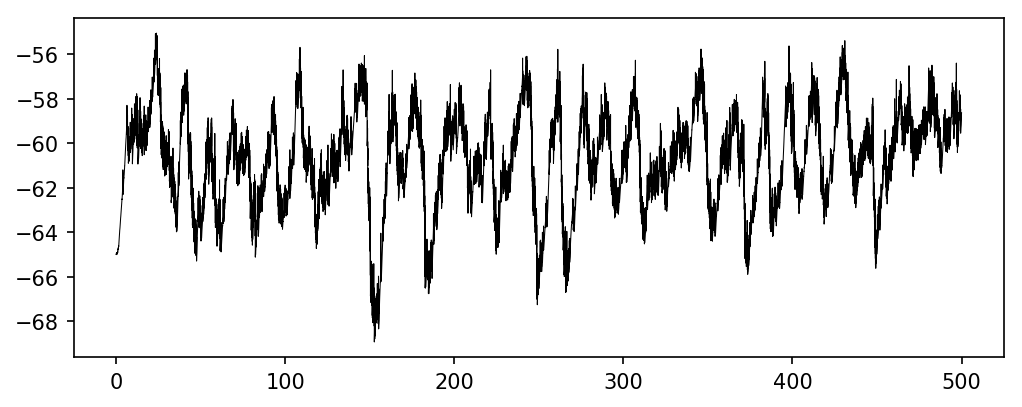

In [217]:
plt.figure(dpi=150, figsize=(8, 3))
plt.plot(nrn._times, v_avg, 'k', lw=0.5)
plt.show()

In [168]:
sv_avg = gaussian_filter1d(v_avg, sigma=1)

In [169]:
dv_avg = (sv_avg[1:] - sv_avg[:-1]) / nrn._dt

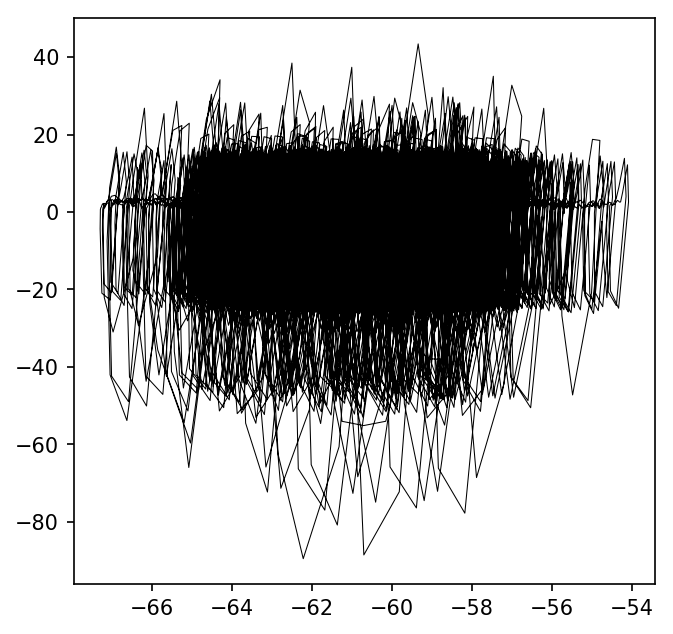

In [180]:
plt.figure(dpi=150, figsize=(5, 5))
plt.plot(sv_avg[1:], dv_avg, 'k', lw=0.5)
# plt.xlim([-61, -60.5])
# plt.ylim([-0, 2])
plt.show()

In [149]:
def f(x, t1, t2):
    return (np.exp(-x/t1)-np.exp(-x/t2))

x = np.linspace(0, 50, 1000)